In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Epoch [100/4000], Loss: 0.0038
Epoch [200/4000], Loss: 0.0020
Epoch [300/4000], Loss: 0.0018
Epoch [400/4000], Loss: 0.0016
Epoch [500/4000], Loss: 0.0015
Epoch [600/4000], Loss: 0.0015
Epoch [700/4000], Loss: 0.0014
Epoch [800/4000], Loss: 0.0014
Epoch [900/4000], Loss: 0.0014
Epoch [1000/4000], Loss: 0.0014
Epoch [1100/4000], Loss: 0.0013
Epoch [1200/4000], Loss: 0.0015
Epoch [1300/4000], Loss: 0.0015
Epoch [1400/4000], Loss: 0.0013
Epoch [1500/4000], Loss: 0.0012
Epoch [1600/4000], Loss: 0.0012
Epoch [1700/4000], Loss: 0.0012
Epoch [1800/4000], Loss: 0.0012
Epoch [1900/4000], Loss: 0.0011
Epoch [2000/4000], Loss: 0.0012
Epoch [2100/4000], Loss: 0.0012
Epoch [2200/4000], Loss: 0.0011
Epoch [2300/4000], Loss: 0.0011
Epoch [2400/4000], Loss: 0.0011
Epoch [2500/4000], Loss: 0.0011
Epoch [2600/4000], Loss: 0.0011
Epoch [2700/4000], Loss: 0.0011
Epoch [2800/4000], Loss: 0.0011
Epoch [2900/4000], Loss: 0.0011
Epoch [3000/4000], Loss: 0.0011
Epoch [3100/4000], Loss: 0.0011
Epoch [3200/4000]

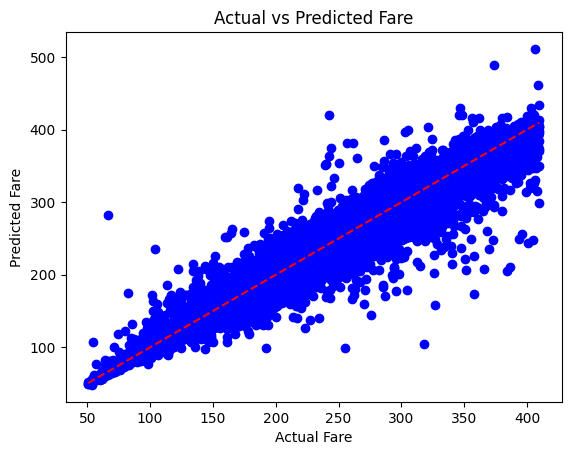

Neural Network Regression Equation:
Fare = 0.1754 + (-0.0850 * Year) + (0.0624 * citymarketid_1) + (-0.1184 * citymarketid_2) + (-0.1217 * nsmiles) + (0.2139 * passengers) + (-0.3352 * large_ms) + (-0.2266 * fare_lg) + (0.1349 * lf_ms) + (-0.0618 * fare_low) + (-0.1653 * city1_lati) + (0.1688 * city1_long) + (0.0669 * city2_lati) + (-0.1448 * city2_long) + (0.0612 * airportid_1_encoded) + (-0.1333 * airportid_2_encoded) + (-0.1221 * citymarketid_1_encoded) + (-0.1319 * citymarketid_2_encoded) + (0.1411 * large_ms_std) + (0.1922 * lf_ms_std) + (-0.1755 * passengers_per_mile) + (0.1241 * passenger_market_demand) + (-0.1477 * miles/passenger) + (-0.0085 * city1_popularity) + (0.0283 * city2_popularity) + (0.0916 * nmiles/popularity1) + (0.0677 * city1_region_Midwest) + (-0.0861 * city1_region_Northeast) + (0.1697 * city1_region_Other) + (-0.3153 * city1_region_South) + (-0.1329 * city1_region_West) + (-0.0754 * city2_region_Midwest) + (0.0698 * city2_region_Northeast)


NameError: name 'r2_score' is not defined

In [1]:
#Chat GPT was consulted for knowledge in nueral network model
data = pd.read_pickle('final_features.pkl')

data = data[['Year', 'citymarketid_1', 'citymarketid_2', 'nsmiles',
    'passengers', 'large_ms', 'fare', 'fare_lg', 'lf_ms', 'fare_low',
    'city1_lati', 'city1_long', 'city2_lati', 'city2_long',
    'airportid_1_encoded', 'airportid_2_encoded',
    'citymarketid_1_encoded', 'citymarketid_2_encoded', 'large_ms_std',
    'lf_ms_std', 'passengers_per_mile', 'passenger_market_demand',
    'miles/passenger', 'city1_popularity', 'city2_popularity',
    'nmiles/popularity1', 'city1_region_Midwest', 'city1_region_Northeast',
    'city1_region_Other', 'city1_region_South', 'city1_region_West',
    'city2_region_Midwest', 'city2_region_Northeast', 'city2_region_Other',
    'city2_region_South', 'city2_region_West']].dropna()

# Remove outliers
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['fare'] >= lower_bound) & (data['fare'] <= upper_bound)]

data['Year'] = data['Year'].astype(float)
data['passengers'] = data['passengers'].astype(float)
data['fare'] = data['fare'].astype(float)

# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['fare']))
target = data['fare'].values.reshape(-1, 1)

# Normalize the target 
scaler_fare = MinMaxScaler()
scaled_target = scaler_fare.fit_transform(target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Neural Network Definition
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetworkModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)         # Second hidden layer
        self.fc3 = nn.Linear(64, 32)          # Third hidden layer
        self.fc4 = nn.Linear(32, 1)           # Output layer
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Start the model
input_dim = X_train.shape[1]  # Number of features
model = NeuralNetworkModel(input_dim)

# Loss function and optimizer
criterion = nn.MSELoss()  # Using MSE Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 4000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad() 
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train_tensor = model(X_train_tensor)
    y_pred_test_tensor = model(X_test_tensor)

    # Rescale the predictions back to the original scale (if 'fare' was normalized)
    y_pred_train = scaler_fare.inverse_transform(y_pred_train_tensor.numpy())
    y_pred_test = scaler_fare.inverse_transform(y_pred_test_tensor.numpy())
    y_test_rescaled = scaler_fare.inverse_transform(y_test_tensor.numpy())

# Plot Actual vs Predicted (on the test set)
plt.scatter(y_test_rescaled, y_pred_test, color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], '--r')  # Line y=x for perfect prediction
plt.show()

torch.save(model.state_dict(), 'trained_neural_network_model.pth')

# Display Regression Formula (Weights and Biases)
def display_regression_formula(model, feature_names):
    print("Neural Network Regression Equation:")
    with torch.no_grad():
        weights = model.fc4.weight[0].numpy()  # Get final layer weights
        bias = model.fc4.bias.item()           # Get final layer bias
        
        equation = "Fare = {:.4f}".format(bias)
        for i, weight in enumerate(weights):
            equation += " + ({:.4f} * {})".format(weight, feature_names[i])
        print(equation)

feature_names = data.drop(columns=['fare']).columns
display_regression_formula(model, feature_names)


print(f'R² score on training data: {r2_train:.4f}')
print(f'R² score on test data: {r2_test:.4f}')

# Calculate Standard Deviation of Residuals (Test)
residuals_test = y_test_rescaled - y_pred_test
std_dev_residuals = np.std(residuals_test)

print(f'Standard Deviation of Residuals (Test): {std_dev_residuals:.4f}')

# Plot Actual vs Predicted (on the test set)
plt.scatter(y_test_rescaled, y_pred_test, color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], '--r')  # Line y=x for perfect prediction
plt.show()



MAE: 6.8148
MSE: 137.8523
RMSE: 11.7411
R²: 0.9710
Standard Deviation of Residuals: 11.6896


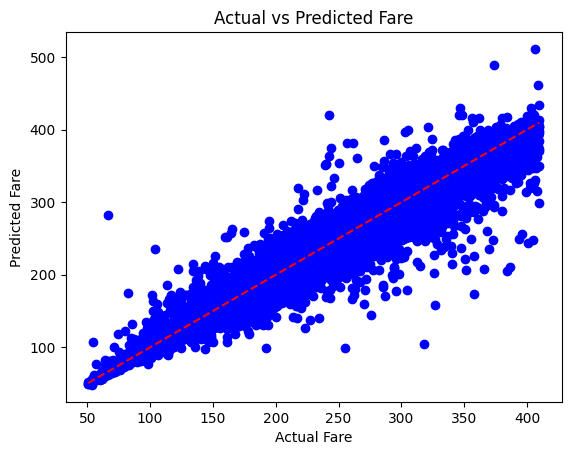

Neural Network Regression Equation:
Fare = 0.1754 + (-0.0850 * Year) + (0.0624 * citymarketid_1) + (-0.1184 * citymarketid_2) + (-0.1217 * nsmiles) + (0.2139 * passengers) + (-0.3352 * large_ms) + (-0.2266 * fare_lg) + (0.1349 * lf_ms) + (-0.0618 * fare_low) + (-0.1653 * city1_lati) + (0.1688 * city1_long) + (0.0669 * city2_lati) + (-0.1448 * city2_long) + (0.0612 * airportid_1_encoded) + (-0.1333 * airportid_2_encoded) + (-0.1221 * citymarketid_1_encoded) + (-0.1319 * citymarketid_2_encoded) + (0.1411 * large_ms_std) + (0.1922 * lf_ms_std) + (-0.1755 * passengers_per_mile) + (0.1241 * passenger_market_demand) + (-0.1477 * miles/passenger) + (-0.0085 * city1_popularity) + (0.0283 * city2_popularity) + (0.0916 * nmiles/popularity1) + (0.0677 * city1_region_Midwest) + (-0.0861 * city1_region_Northeast) + (0.1697 * city1_region_Other) + (-0.3153 * city1_region_South) + (-0.1329 * city1_region_West) + (-0.0754 * city2_region_Midwest) + (0.0698 * city2_region_Northeast)


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_test)
mse = mean_squared_error(y_test_rescaled, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_test)
std_dev_residuals = np.std(y_test_rescaled - y_pred_test)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Standard Deviation of Residuals: {std_dev_residuals:.4f}')

# Plot Actual vs Predicted (on the test set)
plt.scatter(y_test_rescaled, y_pred_test, color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], '--r')  # Line y=x for perfect prediction
plt.show()

torch.save(model.state_dict(), 'trained_neural_network_model.pth')

# Display Regression Formula (Weights and Biases)
def display_regression_formula(model, feature_names):
    print("Neural Network Regression Equation:")
    with torch.no_grad():
        weights = model.fc4.weight[0].numpy()  # Get final layer weights
        bias = model.fc4.bias.item()           # Get final layer bias
        
        equation = "Fare = {:.4f}".format(bias)
        for i, weight in enumerate(weights):
            equation += " + ({:.4f} * {})".format(weight, feature_names[i])
        print(equation)

feature_names = data.drop(columns=['fare']).columns
display_regression_formula(model, feature_names)


In [6]:
def calculate_metrics(y_true, y_pred, dataset_type="Test"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f'{dataset_type} Metrics:')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R²: {r2:.4f}')
    print('-' * 30)

# Rescale training predictions
y_train_rescaled = scaler_fare.inverse_transform(y_train_tensor.numpy())
y_pred_train_rescaled = scaler_fare.inverse_transform(y_pred_train_tensor.numpy())

# Calculate and print metrics for the Training set
calculate_metrics(y_train_rescaled, y_pred_train_rescaled, dataset_type="Training")

# Calculate and print metrics for the Test set
calculate_metrics(y_test_rescaled, y_pred_test, dataset_type="Test")

# Overfitting Test
train_mse = mean_squared_error(y_train_rescaled, y_pred_train_rescaled)
test_mse = mean_squared_error(y_test_rescaled, y_pred_test)


Training Metrics:
MSE: 133.8733
MAE: 6.7320
RMSE: 11.5704
R²: 0.9717
------------------------------
Test Metrics:
MSE: 137.8523
MAE: 6.8148
RMSE: 11.7411
R²: 0.9710
------------------------------
